<h2> ☕️ Passos: </h2>

<h3> Import Libraries </h3>
<h3> Extração dos dados. </h3>
<h3> Visualização dos dados.  </h3>
<h3> Random Forest </h3>
<h3> Decision Tree </h3>

In [25]:
## Imports:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
## Se não forem encontrados módulos, você pode via terminal usar o comando
# pip install -r requirements.txt 
# Ele vai instalar todos os módulos contidos no arquivo de requirements.

In [27]:
def read_check(X):
    df = pd.read_csv(X)
    print('Total of null records   :', df.isnull().sum())
    print('Total of NaN records   :', df.isna().sum())
    print('\n\nDataset description   :\n\n', df.describe())
    print('\n\nDataset shape   :\n', df.shape)
    
    for i in df.columns:    
        display('Unique values of {:10}:'.format(i), df[i].value_counts())

    return df

In [28]:
# Extraindo os dados utilizando uma função que generaliza a inspeção do dataset. 

data_cars = read_check('car_evaluation.csv')

Total of null records   : buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64
Total of NaN records   : buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64


Dataset description   :

        buying maint doors persons lug_boot safety
count    1728  1728  1728    1728     1728   1728
unique      4     4     3       3        3      4
top     vhigh     2     2   small      low  unacc
freq      432   432   576     576      576   1210


Dataset shape   :
 (1728, 6)


'Unique values of buying    :'

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

'Unique values of maint     :'

2        432
3        432
4        432
5more    432
Name: maint, dtype: int64

'Unique values of doors     :'

2       576
4       576
more    576
Name: doors, dtype: int64

'Unique values of persons   :'

small    576
med      576
big      576
Name: persons, dtype: int64

'Unique values of lug_boot  :'

low     576
med     576
high    576
Name: lug_boot, dtype: int64

'Unique values of safety    :'

unacc    1210
acc       384
good       69
vgood      65
Name: safety, dtype: int64

In [32]:
## Visualização:
for i in data_cars.columns: 
    plt.figure()
    sns.countplot(data_cars[i])
    

ValueError: could not convert string to float: 'vhigh'

<Figure size 640x480 with 0 Axes>

In [33]:
data_dummies = pd.get_dummies(data_cars)

In [34]:
corr = data_dummies.corr()

In [35]:
corr

,buying_high,buying_low,buying_med,buying_vhigh,maint_2,maint_3,maint_4,maint_5more,doors_2,doors_4,...,persons_big,persons_med,persons_small,lug_boot_high,lug_boot_low,lug_boot_med,safety_acc,safety_good,safety_unacc,safety_vgood
buying_high,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01,-4.463165e-17,-2.544261e-17,-4.051971e-17,8.566536e-18,-1.794101e-17,-3.761318e-17,...,9.387557e-17,7.019028e-17,6.287224e-17,1.967216e-18,6.476076e-17,1.916069e-17,0.028932,-0.117745,0.033546,-0.022829
buying_low,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01,1.118790e-16,6.673331e-17,6.279271e-17,-3.563679e-17,1.731150e-17,8.057718e-17,...,-1.117379e-16,-9.694442e-17,-8.340997e-17,-1.762626e-17,-1.038690e-16,-4.658368e-17,-0.012859,0.196241,-0.100638,0.068486
buying_med,-3.333333e-01,-3.333333e-01,1.000000e+00,-3.333333e-01,2.715592e-17,1.362079e-17,8.480870e-18,6.339236e-18,9.725918e-17,-9.600016e-18,...,-3.989515e-17,2.077380e-17,8.049849e-17,1.188199e-17,-1.628855e-17,2.726562e-17,0.061078,0.039248,-0.100638,0.068486
buying_vhigh,-3.333333e-01,-3.333333e-01,-3.333333e-01,1.000000e+00,-4.565964e-17,2.287265e-17,-4.360367e-17,-1.696174e-17,-7.754767e-17,-4.434106e-17,...,6.641322e-17,4.918041e-18,-4.811811e-17,3.540989e-18,5.315419e-17,1.927872e-18,-0.077152,-0.117745,0.167730,-0.114143
maint_2,-4.463165e-17,1.118790e-16,2.715592e-17,-4.565964e-17,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01,-7.790177e-18,-1.510822e-17,...,5.272140e-18,1.353445e-17,-7.632800e-18,-4.406565e-18,3.926564e-17,2.175741e-17,-0.048220,-0.015358,0.068550,-0.043901
maint_3,-2.544261e-17,6.673331e-17,1.362079e-17,2.287265e-17,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01,1.530494e-17,2.490496e-17,...,2.108856e-17,1.766560e-17,2.112790e-17,2.856398e-17,1.916069e-17,2.250496e-17,0.009644,0.005119,-0.007293,-0.008780
maint_4,-4.051971e-17,6.279271e-17,8.480870e-18,-4.360367e-17,-3.333333e-01,-3.333333e-01,1.000000e+00,-3.333333e-01,9.639360e-18,-1.349510e-17,...,1.573773e-18,-1.286560e-17,8.537719e-18,-3.383612e-18,-2.034102e-17,-1.054428e-17,0.019288,0.005119,-0.030629,0.026341
maint_5more,8.566536e-18,-3.563679e-17,6.339236e-18,-1.696174e-17,-3.333333e-01,-3.333333e-01,-3.333333e-01,1.000000e+00,-1.432134e-17,-1.432134e-17,...,-1.951479e-17,-2.313446e-17,-1.321969e-17,-1.982954e-17,-3.698367e-17,-2.990169e-17,0.019288,0.005119,-0.030629,0.026341
doors_2,-1.794101e-17,1.731150e-17,9.725918e-17,-7.754767e-17,-7.790177e-18,1.530494e-17,9.639360e-18,-1.432134e-17,1.000000e+00,-5.000000e-01,...,4.409089e-18,4.047688e-18,1.301043e-18,5.782412e-18,1.900968e-17,7.661695e-18,-0.377964,-0.144207,0.462655,-0.139796
doors_4,-3.761318e-17,8.057718e-17,-9.600016e-18,-4.434106e-17,-1.510822e-17,2.490496e-17,-1.349510e-17,-1.432134e-17,-5.000000e-01,1.000000e+00,...,9.613259e-18,1.445603e-19,2.891206e-19,1.590163e-18,-9.468699e-18,-5.963112e-18,0.206699,0.081508,-0.244725,0.053768


Text(0.5, 1.0, 'Mapa de calor da matriz de correlação')

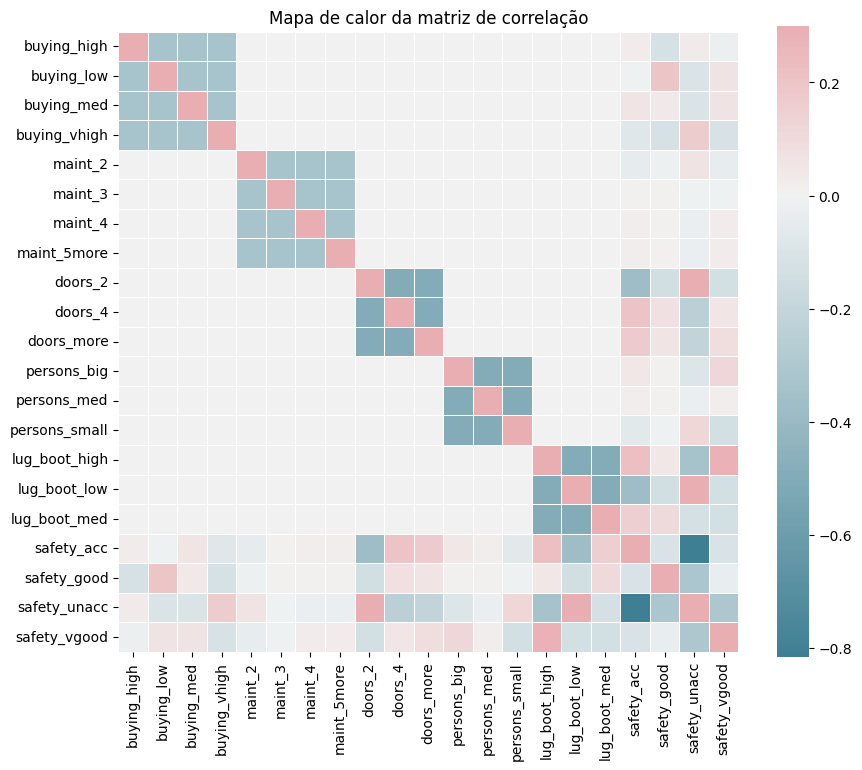

In [36]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Mapa de calor da matriz de correlação')

In [37]:
# Vamos dropar a coluna safety, pois ela será nossa target label.
data_cars = data_cars.reset_index().drop(['index'], axis=1)

x_data = data_cars.drop(['safety'], axis=1)
y_data = data_cars['safety']

display(data_cars)


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,2,2,small,low,unacc
1,vhigh,2,2,small,med,unacc
2,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,low,unacc
4,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
1723,low,5more,more,med,med,good
1724,low,5more,more,med,high,vgood
1725,low,5more,more,big,low,unacc
1726,low,5more,more,big,med,good


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.25)


In [39]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

Text(0, 0.5, 'Testing Accuracy')

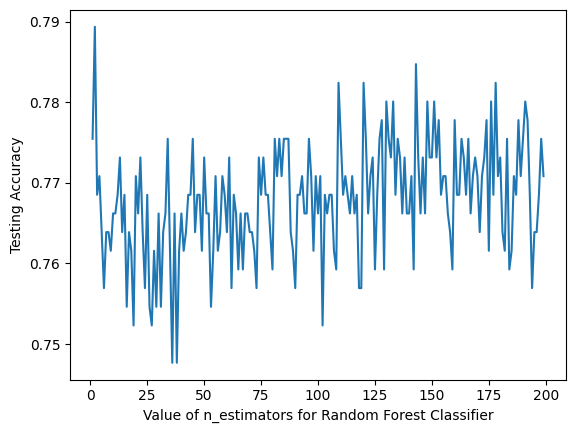

In [40]:
## Nesse código vamos descobrir a melhor quantidade de árvores para nosso dataset, ou seja, 
## vamos rodar um gráfico acurácia vs. n-estimators (quantd. de árvores)
## e vamos selecionar a quantidade com maior número de árvores que não seja 1. 

scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k, max_features='log2')
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

# Porque o index da lista vai de 0 a n. Logo, somo 1.
n_estimators = scores.index(max(scores))+1

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [41]:
rfc = RandomForestClassifier(n_estimators=n_estimators, max_features='log2')
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)

In [43]:
accuracy

0.7847222222222222

In [44]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [45]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))      

print ("Accuracy : \n",
accuracy_score(y_test,y_pred)*100)
  
print("Report : \n",
classification_report(y_test, y_pred))

Confusion Matrix: 
 [[ 54   9  24   5]
 [ 10   1   0   0]
 [ 31   0 280   0]
 [ 14   0   0   4]]
Accuracy : 
 78.47222222222221
Report : 
               precision    recall  f1-score   support

         acc       0.50      0.59      0.54        92
        good       0.10      0.09      0.10        11
       unacc       0.92      0.90      0.91       311
       vgood       0.44      0.22      0.30        18

    accuracy                           0.78       432
   macro avg       0.49      0.45      0.46       432
weighted avg       0.79      0.78      0.78       432



In [74]:
from sklearn.tree import export_graphviz
from six import StringIO 
import pydotplus
from IPython.display import Image

i_tree = 0
dot_data = StringIO()
for tree_in_forest in rfc.estimators_:#rfc random forest classifier
    if (i_tree == 1):        
        export_graphviz(tree_in_forest, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())        
    i_tree = i_tree + 1
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [73]:
! pip3 install --upgrade python-graphviz


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
